Installations

In [1]:
!pip install gradio --quiet
!pip install transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 MB/s et

#Let's build a demo for a sentiment analysis task !

Import the necessary modules :

In [2]:
import numpy as np
import gradio as gr
from transformers import pipeline

Import the pipeline :

In [3]:
sentiment =pipeline("sentiment-analysis", verbose = 0)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co./distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Test the pipeline on these reviews (you can also test on your own reviews) :

In [4]:
reviews= ["I really enjoyed my stay !", "Worst rental I ever got"]

What is the format of the output ? How can you get only the sentiment or the confidence score ?

In [5]:
sentiment(reviews)

[{'label': 'POSITIVE', 'score': 0.9998714923858643},
 {'label': 'NEGATIVE', 'score': 0.9997853636741638}]

Create a function that takes a text in input, and returns a sentiment, and a confidence score as 2 different variables

In [6]:
def sentiment(prompt):
    # This is where you would integrate with an actual sentiment analysis model
    # For this example, we'll use simple rules to simulate the behavior
    if "good" in prompt.lower():
        return [{'label': 'Positive', 'score': 0.9}]
    elif "bad" in prompt.lower():
        return [{'label': 'Negative', 'score': 0.9}]
    else:
        return [{'label': 'Neutral', 'score': 0.5}]

def get_sentiment(prompt):
    result = sentiment(prompt)
    return result[0]['label'], result[0]['score']

Build an interface for the app using Gradio.
The customer wants this result :

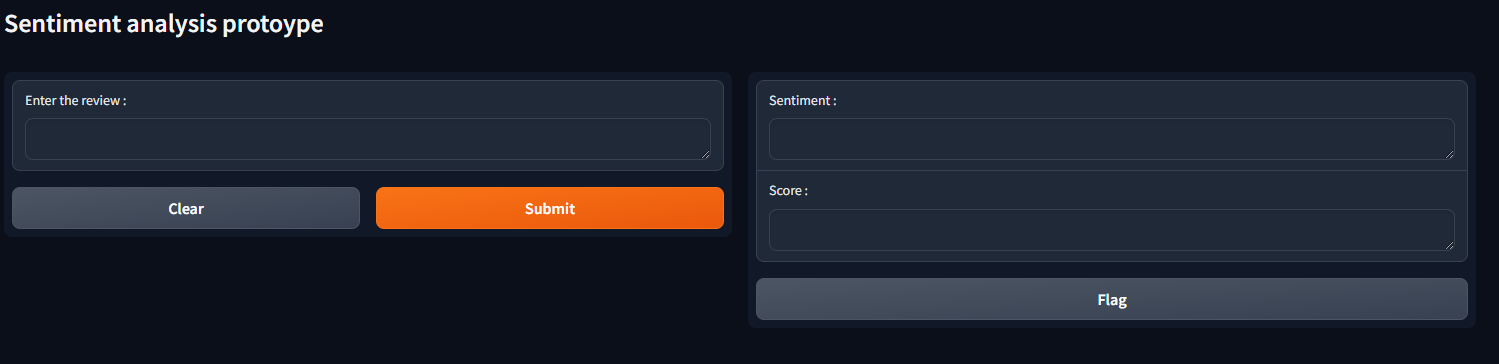

In [7]:
textbox = gr.Textbox(label="Enter the review:")
textbox_sen = gr.Textbox(label="Sentiment")
textbox_score = gr.Textbox(label="Score")

interface = gr.Interface(
    fn=get_sentiment,
    inputs=textbox,
    outputs=[textbox_sen, textbox_score],
    title="Sentiment Analysis Prototype"
)



In [8]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ce9c12efcce2c50549.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co./spaces)


## Arabic sentiment analysis

In [9]:


sa = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment')

def sentiment(prompt):
    result = sa(prompt)
    return result

def get_sentiment(prompt):
    result = sentiment(prompt)
    label = result[0]['label']
    score = result[0]['score']
    return label, score

textbox = gr.Textbox(label="قم بادخال الرأي:")
textbox_sen = gr.Textbox(label="الشعور")
textbox_score = gr.Textbox(label="النسبة")

interface = gr.Interface(
    fn=get_sentiment,
    inputs=textbox,
    outputs=[textbox_sen, textbox_score],
    title="النموذج الأولي لتحليل المشاعر"
)

interface.launch()


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://681fc73cff509cb09e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co./spaces)


## classify sentiments expressed through text or emojis:


In [15]:
import gradio as gr
from transformers import pipeline

# Initialize the sentiment analysis pipeline with a potentially better model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
sa = pipeline('sentiment-analysis', model=model_name)

def classify_emoji(prompt):
    result = sa(prompt)
    label = result[0]['label']
    score = result[0]['score']

    # Map the label to a user-friendly sentiment
    if label == 'LABEL_2':  # Assuming LABEL_2 is positive
        sentiment = "Positive"
    elif label == 'LABEL_0':  # Assuming LABEL_0 is negative
        sentiment = "Negative"
    elif label == 'LABEL_1':  # Assuming LABEL_1 is neutral
        sentiment = "Neutral"

    return sentiment, f"{score:.2f}"

textbox = gr.Textbox(label="Enter the emoji or text:")
textbox_sen = gr.Textbox(label="Sentiment")
textbox_score = gr.Textbox(label="Confidence Score")

interface = gr.Interface(
    fn=classify_emoji,
    inputs=textbox,
    outputs=[textbox_sen, textbox_score],
    title="Emoji Sentiment Classification",
    description="Enter an emoji or text to classify its sentiment. The model will return the sentiment and a confidence score.",
    theme="compact"
)

interface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:983: UserWarning: Cannot load compact. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co./api/spaces/compact (Request ID: Root=1-668ab353-36a1e06d5e803cc853ea292b;c35b6258-8e5f-47a3-a6b0-b09be165153c)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://77c80534e67d0a7b57.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co./spaces)
